<a href="https://colab.research.google.com/github/sjangnure/CS6643-Computer-Vision/blob/main/Face%20Recognition/CV_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CV Project 2: Face Recognition Using Eigenface Method\
Submitted by: Sanjana Jangnure(sbj286)
Colab link for the program: https://colab.research.google.com/drive/195-p7XrNeybT_iyI7WRXnKeLeOJHI3N_?usp=sharing 

In [ ]:
# import statements
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg as la

## Reading images and Eigenface Training




### Create a folder named CV_project2 in your google drive and then upload the Face dataset folder in it.

In [ ]:
# after uploading the face dataset folder, run this code to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read all the training images one by one 
train_image=['01','02','03','07','10','11','14','15']
train_img_name = [] # save all the names of the train image files in this list
for i in range(len(train_image)):
  filename="subject"+train_image[i]+".normal.jpg"
  train_img_name.append(filename)
  input_image = cv2.imread("/content/drive/MyDrive/CV_project2/Face dataset/Training/"+filename) #read the input image. It is read in bgr format
  input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
  if i==0:

    # Form a column Ri
    ri_vect1=input_image.reshape(1,45045)
    M=ri_vect1
  else:

    # Form a column vector Ri of dimension 231*195=45045
    ri_vect1=input_image.reshape(1,45045)
    
    # Column vector for 8 training faces of dimension 45045*8
    M=np.append(M,ri_vect1,axis=0)

In [ ]:
# Calculate mean face m
m=np.mean(M, axis=0)

In [ ]:
print(max(m))

255.0


In [ ]:
print(min(m))

8.375


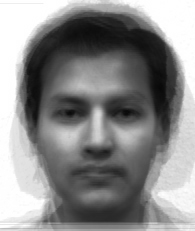

True

In [ ]:
# show mean face
mean_face = m.reshape(231,195)
cv2_imshow(mean_face)
# save the mean face in .jpg
cv2.imwrite('mean_face.jpg',mean_face)

In [ ]:
# Form a single matrix A of dimension 45045*8: [R1,R2,....R8]
M2=np.ndarray(shape=(8,45045))
for i in range(len(train_image)):
  M2[i]=M[i]-m
A=M2.T

### Finding M largest eigenvalues

In [ ]:
# Calculate L of dimension 8*8
L=np.matmul((A.T),A)

In [ ]:
print(L)

[[ 1.21071641e+08 -3.12498262e+07 -6.21853206e+06 -6.93158119e+07
  -1.00485956e+07  6.74408656e+06  1.96453819e+07 -3.06283437e+07]
 [-3.12498262e+07  1.01670188e+08 -1.82779222e+07  2.70312989e+07
  -1.84131967e+07 -4.81172446e+07 -3.51760462e+07  2.25327492e+07]
 [-6.21853206e+06 -1.82779222e+07  8.46801179e+07  1.35532741e+07
  -1.60222026e+07 -5.77413864e+07 -1.23323721e+07  1.23590233e+07]
 [-6.93158119e+07  2.70312989e+07  1.35532741e+07  1.27011180e+08
  -2.55351424e+07 -8.89584363e+07 -2.66663889e+07  4.28800264e+07]
 [-1.00485956e+07 -1.84131967e+07 -1.60222026e+07 -2.55351424e+07
   9.68805989e+07 -1.29632469e+07  1.87634644e+07 -3.26616792e+07]
 [ 6.74408656e+06 -4.81172446e+07 -5.77413864e+07 -8.89584363e+07
  -1.29632469e+07  2.91209042e+08 -3.08584438e+05 -8.98642301e+07]
 [ 1.96453819e+07 -3.51760462e+07 -1.23323721e+07 -2.66663889e+07
   1.87634644e+07 -3.08584438e+05  8.60266149e+07 -4.99520697e+07]
 [-3.06283437e+07  2.25327492e+07  1.23590233e+07  4.28800264e+07
  -

In [ ]:
# Calculate eigen values and eigen vectors of L
# from numpy import linalg as LA
from numpy.linalg import eig

values , vectors = eig(L)

In [ ]:
print(values)

[4.07889586e+08 1.93736702e+08 3.24217378e-08 1.32113404e+08
 4.55012084e+07 1.05599222e+08 8.22495667e+07 6.67942164e+07]


In [ ]:
print(vectors)

[[-1.85930999e-01  5.09243672e-01  3.53553391e-01 -5.56573691e-01
   4.47000316e-01  1.97974336e-01 -1.63757086e-01  7.42076054e-02]
 [ 2.09839801e-01 -2.74996556e-01  3.53553391e-01 -3.29883214e-04
  -2.26175989e-01  6.88986864e-01 -2.87164229e-01 -3.83434834e-01]
 [ 1.66489877e-01  1.47672668e-01  3.53553391e-01 -1.60450373e-01
  -1.98001361e-01 -5.81888747e-01  4.11391973e-02 -6.48257738e-01]
 [ 3.90707166e-01 -3.09170220e-01  3.53553391e-01  2.74303951e-01
   5.26186091e-01 -2.83776788e-01 -3.78918958e-01  2.24807437e-01]
 [-6.30098967e-02  2.74102094e-01  3.53553391e-01  5.80860871e-01
   2.49789676e-01  2.02335985e-01  5.82563541e-01 -1.25632127e-01]
 [-7.59925036e-01 -5.24264240e-01  3.53553391e-01 -5.47471248e-02
   7.54985947e-03 -1.30838804e-01  4.88626627e-02  1.00172936e-02]
 [-1.34358831e-01  3.90311804e-01  3.53553391e-01  3.08748189e-01
  -5.53852578e-01 -9.44359061e-02 -3.63693198e-01  4.01665776e-01]
 [ 3.76187919e-01 -2.12899224e-01  3.53553391e-01 -3.91811938e-01
  -

In [ ]:
# Calculate M largest vectors of C by U=AV with dimensions 45045*8
U=np.matmul(A,vectors)

In [ ]:
# print(U[30:60])

In [ ]:
# Printing range for values of U
Umin=np.amin(U)
Umax=np.amax(U)
print("Global min of U is",Umin)
print("Global max of U is",Umax)

for i in range(8):
  print("max of image ",i,max(U[:,i]))
  print(min(U[:,i]))


Global min of U is -256.5071144810872
Global max of U is 294.51908669304487
max of image  0 266.8924410349647
-256.5071144810872
max of image  1 294.51908669304487
-214.69764190615052
max of image  2 2.0961010704922955e-13
-1.8474111129762605e-13
max of image  3 209.02650828540763
-202.35667020370434
max of image  4 151.43751900215273
-161.4471324508332
max of image  5 194.944963764783
-250.81832766716136
max of image  6 192.54947625998258
-253.23523871492256
max of image  7 248.69536158009345
-199.10994581487085


Since the range of U is outside -255 to 255 We need to convert it to a range[0,255] for displaying the Eigenface images using:
(g - Umin) x 255/(Umax - Umin)

In [ ]:
U2=np.ndarray(shape=(45045,8))
# print(U.shape[0])
for i in range(U.shape[0]):
  for j in range(U.shape[1]):
    g = U[i][j]
    g = (g - Umin) * 255/(Umax - Umin)
    U2[i][j]=g

In [ ]:
# Printing the range for values of U
Umin=np.amin(U2)
Umax=np.amax(U2)
print("Global min of U is",Umin)
print("Global max of U is",Umax)
print("\n")
for i in range(8):
  print("max of image",i,"is",max(U2[:,i]))
  print("min of image",i,"is",min(U2[:,i]))
  print("\n")

Global min of U is 0.0
Global max of U is 255.0


max of image 0 is 242.21513672526038
min of image 0 is 0.0


max of image 1 is 255.0
min of image 1 is 19.348291395021526


max of image 2 is 118.70454445415207
min of image 2 is 118.70454445415189


max of image 3 is 215.43635049024067
min of image 3 is 25.059358813264488


max of image 4 is 188.7857261897289
min of image 4 is 43.991184749587795


max of image 5 is 208.91979311945144
min of image 5 is 2.632616442666534


max of image 6 is 207.81122638991573
min of image 6 is 1.514135477758037


max of image 7 is 233.79402126631368
min of image 7 is 26.561854914880723




Eigen face: 1


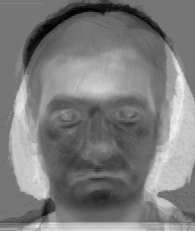

Eigen face: 2


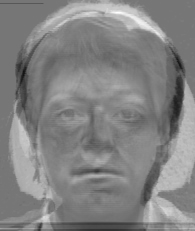

Eigen face: 3


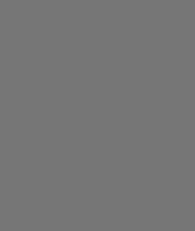

Eigen face: 4


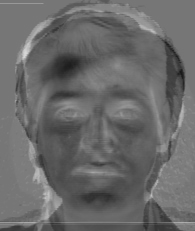

Eigen face: 5


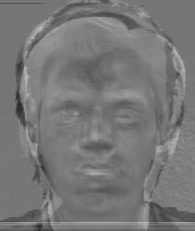

Eigen face: 6


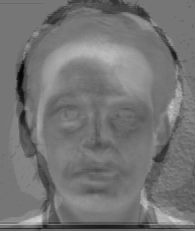

Eigen face: 7


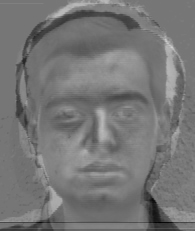

Eigen face: 8


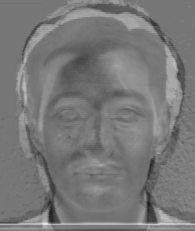

In [ ]:
# show 8 eigenfaces (U has 8 eigenfaces) and save them in .jpg
for i in range(U2.shape[1]):
  eigen_face = ((U2[:,i]).reshape(231,195))
  print("Eigen face:",(i+1))
  cv2_imshow(eigen_face)
  fname = 'Eigenface'+str(i+1)+'.jpg'
  cv2.imwrite(fname,eigen_face)

In [ ]:
# calculate omega values for all training images(omega_i)
omega=np.zeros(shape=(len(train_image),len(train_image)))
for i in range(len(train_image)):
  omega[i]=np.matmul(U.T,A[:,i])
print("Omega values for training images are(each row in numpy array represents an Eigen value for a training image):-")
print(omega)

Omega values for training images are(each row in numpy array represents an Eigen value for a training image):-
[[-7.58393182e+07  9.86591897e+07 -3.00703364e-09 -7.35308451e+07
   2.03390545e+07  2.09059360e+07 -1.34689494e+07  4.95663886e+06]
 [ 8.55914694e+07 -5.32769258e+07 -5.70700139e-08 -4.35819945e+04
  -1.02912808e+07  7.27564771e+07 -2.36191334e+07 -2.56112293e+07]
 [ 6.79094869e+07  2.86096157e+07  5.18092693e-09 -2.11976451e+07
  -9.00930120e+06 -6.14469992e+07  3.38368115e+06 -4.32998677e+07]
 [ 1.59365384e+08 -5.98976188e+07  4.63232078e-08  3.62392288e+07
   2.39421030e+07 -2.99666082e+07 -3.11659201e+07  1.50158366e+07]
 [-2.57010807e+07  5.31036358e+07  9.35550849e-09  7.67395071e+07
   1.13657321e+07  2.13665227e+07  4.79155988e+07 -8.39149947e+06]
 [-3.09965508e+08 -1.01569225e+08 -2.39392109e-08 -7.23282904e+06
   3.43527729e+05 -1.38164759e+07  4.01893283e+06  6.69097274e+05]
 [-5.48035678e+07  7.56177219e+07  2.95500420e-08  4.07897743e+07
  -2.52009615e+07 -9.9723

## Eigenface Recognition

In [ ]:
# read all the test images one-by-one
test_image = ['01','07','11','14','14']
test_img_name = [] # save all the names of the test images in this list
for i in range(len(test_image)):
  test_fname = None
  if i!=len(test_image)-1:
    test_fname = 'subject'+test_image[i]+'.happy.jpg'
  else:
    test_fname = 'subject'+test_image[i]+'.sad.jpg'
  test_img_name.append(test_fname)

  # read test image I
  test_data = cv2.imread("/content/drive/MyDrive/CV_project2/Face dataset/Testing/"+test_fname) # read in BGR format
  test_data = cv2.cvtColor(test_data,cv2.COLOR_BGR2GRAY)
  
  # convert each test image into column vector, I_ini of dimension 231*195=45045
  I_ini = test_data.reshape(1,45045)
  if i==0:
    I = I_ini # I is the m testing faces of dimension 45045*m 
  else: 
    I = np.append(I,I_ini,axis=0) # I of dimension 45045*m is formed here (in our case m=5)

In [ ]:
# function to calculate Euclidean distance between 2 numpy arrays
def Euclidean_dist(a,b):
  ed = np.sum(np.square(a-b))
  return np.sqrt(ed)

In [ ]:
from numpy import linalg as LA

# initialize an array to store face recognition result for all test images
face_recog = []

# compute omega_I and recognition result for each test image
for i in range(len(test_image)):
  print("For input test image:",(i+1))
  I_vec=np.zeros(shape=(1,45045))

  # subtract mean face of training images m from input test image I to form I_vec; dim=(45045,1)
  I_vec = I[i] - m
  
  # compute omega_I,i.e, eigenface coefficient for each test image
  omega_I = np.matmul(U.T,I_vec.reshape(45045,1))

  # print the eigenface coefficients for all the test images
  print("\nOmega_I for test_image",(i+1),"is:",omega_I)

  # compute Euclidean distance between omega_I (current test image omega) and omega for all the training images(omega)
  eu_dist = []
  for j in range(len(train_image)):
    eu_dist.append(Euclidean_dist(omega_I, omega[j].reshape(8,1)))
  eu_dist = np.array(eu_dist)

  # find the minimum euclidean distance between the input test image coefficient and all the training images coefficients
  eu_dist_min = np.amin(eu_dist)
  print("\nMinimum Euclidean distance for input image",(i+1),"is:",eu_dist_min)

  # find the index of the training image in the training images dataset which matches with the current input test image
  face_index = np.argmin(eu_dist)
  face_recog.append(face_index+1)
  print("\nTest input image",(test_img_name[i]),"matches with training image",(train_img_name[face_index]))
  print("\n\n\n")

# face recognition actual output array
face_recog = np.array(face_recog)

For input test image: 1

Omega_I for test_image 1 is: [[-2.84226819e+07]
 [ 6.21657618e+07]
 [-9.29216862e-09]
 [-5.58402336e+07]
 [ 1.39551196e+07]
 [ 2.39919521e+07]
 [-1.56038461e+07]
 [-4.88745009e+05]]

Minimum Euclidean distance for input image 1 is: 63067848.62498441

Test input image subject01.happy.jpg matches with training image subject01.normal.jpg




For input test image: 2

Omega_I for test_image 2 is: [[ 1.03893380e+08]
 [-9.15597753e+06]
 [ 1.49392389e-08]
 [ 2.31395182e+07]
 [ 9.78874352e+05]
 [-3.10262255e+06]
 [-4.00701970e+06]
 [ 6.01476791e+06]]

Minimum Euclidean distance for input image 2 is: 88831686.49484487

Test input image subject07.happy.jpg matches with training image subject07.normal.jpg




For input test image: 3

Omega_I for test_image 3 is: [[-2.91280480e+08]
 [-1.07981032e+08]
 [-2.73161852e-08]
 [-8.07984970e+06]
 [-3.16856693e+06]
 [-8.84253231e+06]
 [-2.77433359e+06]
 [ 1.23549801e+06]]

Minimum Euclidean distance for input image 3 is: 21783094.36

In [ ]:
# correct recognition expected values array(test image (index) matches with training image (value) in the array)
correct_recog = np.array([1,4,6,7,7])

# difference array(accuracy) for difference between actual and expected output
accuracy_arr = np.equal(face_recog, correct_recog).astype(int)

# calculate the accuracy of face recognition
acc = np.sum(accuracy_arr)/5
print("Accuracy is:",(acc*100))

Accuracy is: 100.0
